# Value at Risk Assessment Model

### Import Packages

In [0]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


### Distributions - Set Up Stock Parameters

In [0]:
# Number of shares
shares_MSFT = 1000


# Live stock price
price = yf.Ticker('MSFT')
print('MSFT')
print('--------------------------------')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

MSFT
--------------------------------

30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [0]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4-week treasury bill rate)
rfr_MSFT = 0.02

# Volatility (30-day volatility at that time)
vol_MSFT = 0.509

### Simulations - Calculate Investment Returns

In [0]:
# Number of simulations
simulations  = 50000

# Investment time in a year
t_MSFT = 21/252

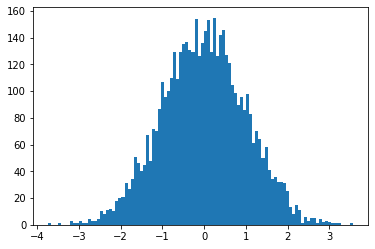

In [0]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample, bins = 100)
plt.show()


In [0]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulation):
  end_value = pv * np.exp((rfr - 0.5 * vol **2) * t + np.random.standard_normal(simulations) * vol * np.sqrt(t))
  returns = end_value - pv
  return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [0]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.
x = 0.9 
y = 3455.248
print("Var at {} confidence level: ${:,.0f}".format(x, y))

Var at 0.9 confidence level: $3,455

Var at 0.9 confidence level: $-44,166
Var at 0.95 confidence level: $-54,849
Var at 0.99 confidence level: $-73,307

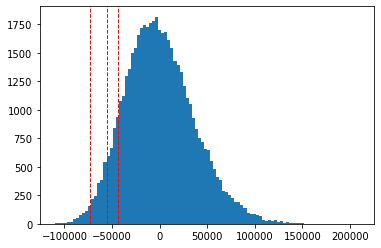

In [0]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10, 5, 1]
for i in percentiles:
  confidence = (100 -i)/100
  value = np.percentile(returns_MSFT, i)
  print("Var at {} confidence level: ${:,.0f}".format(confidence, value))
  plt.axvline(value, color = 'red', linestyle = 'dashed', linewidth = 1)
